# predict IV from stock price and strike price

### Calulcate IV

In [8]:
import numpy as np
from scipy.stats import norm

N_prime = norm.pdf
N = norm.cdf


def black_scholes_call(S, K, T, r, sigma):
    '''

    :param S: Asset price
    :param K: Strike price
    :param T: Time to maturity
    :param r: risk-free rate (treasury bills)
    :param sigma: volatility
    :return: call price
    '''

    ###standard black-scholes formula
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call = S * N(d1) -  N(d2)* K * np.exp(-r * T)
    return call

def vega(S, K, T, r, sigma):
    '''

    :param S: Asset price
    :param K: Strike price
    :param T: Time to Maturity
    :param r: risk-free rate (treasury bills)
    :param sigma: volatility
    :return: partial derivative w.r.t volatility
    '''

    ### calculating d1 from black scholes
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)

    #see hull derivatives chapter on greeks for reference
    vega = S * N_prime(d1) * np.sqrt(T)
    return vega



def implied_volatility_call(C, S, K, T, r, tol=0.0001,
                            max_iterations=100):
    '''

    :param C: Observed call price
    :param S: Asset price
    :param K: Strike Price
    :param T: Time to Maturity
    :param r: riskfree rate
    :param tol: error tolerance in result
    :param max_iterations: max iterations to update vol
    :return: implied volatility in percent
    '''


    ### assigning initial volatility estimate for input in Newton_rap procedure
    sigma = 0.3
    
    for i in range(max_iterations):

        ### calculate difference between blackscholes price and market price with
        ### iteratively updated volality estimate
        diff = black_scholes_call(S, K, T, r, sigma) - C

        ###break if difference is less than specified tolerance level
        if abs(diff) < tol:
            print(f'found on {i}th iteration')
            print(f'difference is equal to {diff}')
            break

        ### use newton rapshon to update the estimate
        sigma = sigma - diff / vega(S, K, T, r, sigma)

    return sigma

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("SVM_train_02.csv")

In [122]:
dataset

,Strike,Stock,option_price,IV
0,21000.0,18127.35,27.60,0.14
1,22000.0,18127.35,12.25,0.15
2,23000.0,18127.35,9.40,0.18
3,24000.0,18127.35,6.85,0.20
4,18000.0,18127.35,789.10,0.11
...,...,...,...,...
4239,16900.0,16945.05,133.00,0.12
4240,16950.0,16945.05,106.45,0.12
4241,17000.0,16945.05,83.00,0.12
4242,17050.0,16945.05,63.20,0.12


In [3]:
x = dataset[['Strike', 'Stock', 'option_price']]
y = dataset[['IV']]

### Graph of Strike vs IV

In [8]:
print (X)
print (Y)

[21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 11000.0, 12000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 17000.0, 11000.0, 12000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 11000.0, 12000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 11000.0, 12000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 11000.0, 12000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 20000.0, 12000.0, 17100.0, 17150.0, 17200.0, 17250.0, 17300.0, 17350.0, 17400.0, 17450.0, 21000.0, 22000.0, 23000.0, 24000.0, 17500.0, 17550.0, 17600.0, 17650.0, 17700.0, 17750.0, 17800.0, 17850.0, 17900.0, 17950.0, 18000.0, 18050.0, 18100.0, 18150.0, 18200.0, 18250.0, 18300.0, 18350.0, 18400.0, 18450.0, 18500.0, 18550.0, 18600.0, 18650.0, 18700.0, 18750.0, 18800.0, 18850.0, 18900.0, 18950.0, 19000.0, 19050.0, 19100.0, 19150.0, 19200.0, 19250.0, 19300.0, 19350.0, 19400.0, 19450.0, 19500.0, 19550.0, 19600.0, 19650.0, 19700.0, 

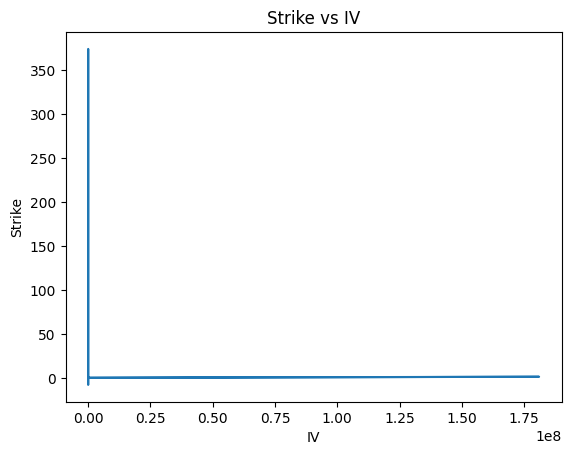

In [9]:
import matplotlib.pyplot as plt 

X = list(x['Strike'])
Y = list(y['IV'])

plt.plot(X, Y)

plt.xlabel("IV")
plt.ylabel("Strike")

plt.title("Strike vs IV")

plt.show()

## Graph of underlying price and IV

In [12]:
print (X)
print (Y)

[18127.35, 18127.35, 18127.35, 18127.35, 18127.35, 18127.35, 18127.35, 18127.35, 18127.35, 17806.8, 17806.8, 17806.8, 17806.8, 17806.8, 17806.8, 17806.8, 17806.8, 17806.8, 17806.8, 18014.6, 18014.6, 18014.6, 18014.6, 18014.6, 18014.6, 18014.6, 18014.6, 18014.6, 18132.3, 18132.3, 18132.3, 18132.3, 18132.3, 18132.3, 18132.3, 18132.3, 18132.3, 18122.5, 18122.5, 18122.5, 18122.5, 18122.5, 18122.5, 18122.5, 18122.5, 18122.5, 18191.0, 18191.0, 18191.0, 18191.0, 18191.0, 18191.0, 18191.0, 18191.0, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 18105.3, 

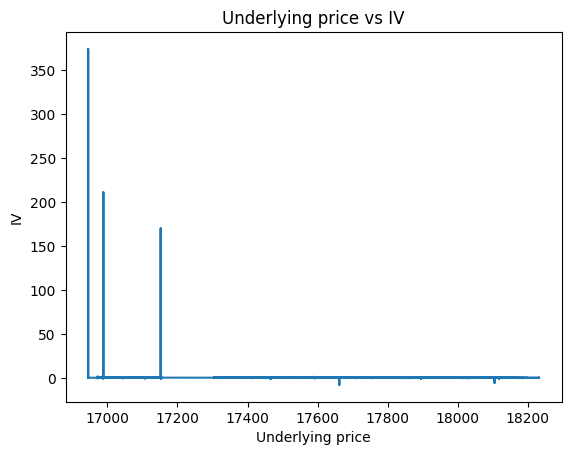

In [13]:
import matplotlib.pyplot as plt 

X = list(x['Stock'])
Y = list(y['IV'])

plt.plot(X, Y)

plt.ylabel("IV")
plt.xlabel("Underlying price")

plt.title("Underlying price vs IV")

plt.show()

## Gprah for option price vs volatality

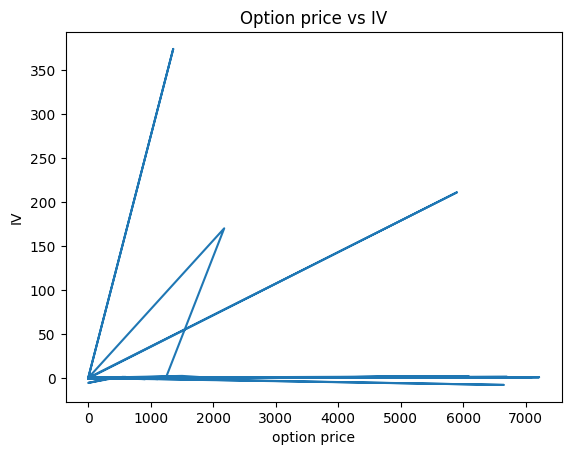

In [14]:
import matplotlib.pyplot as plt 

X = list(x['option_price'])
Y = list(y['IV'])

plt.plot(X, Y)

plt.ylabel("IV")
plt.xlabel("option price")

plt.title("Option price vs IV")

plt.show()

In [125]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [126]:
from sklearn.linear_model import LinearRegression

model_iv = LinearRegression()

model_iv.fit(x_train, y_train)

print(model_iv.coef_)

print(model_iv.intercept_)


[[ 1.94498620e-09 -3.43759408e-04  3.95243598e-04]]
[6.15097168]


In [127]:
predictions = model_iv.predict(x_test)

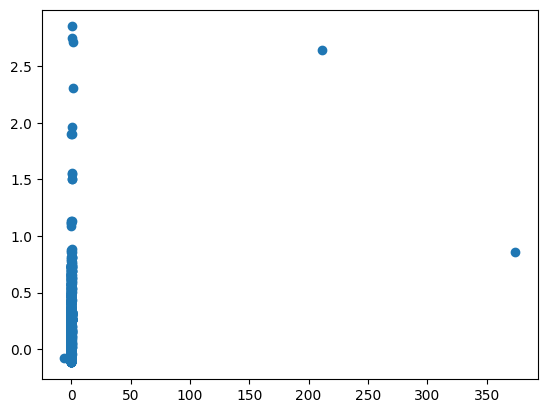

In [128]:
plt.scatter(y_test, predictions)

# predict option price from IV, stock price and strike price

In [9]:
x = dataset[['Strike', 'Stock', 'IV']]
y = dataset[['option_price']]

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [11]:
from sklearn.linear_model import LinearRegression

model_op = LinearRegression()

model_op.fit(x_train, y_train)

print(model_op.coef_)

print(model_op.intercept_)

[[-0.12245601 -0.10443574  5.93837918]]
[4292.5337641]


In [13]:
y_pred = model_op.predict(x_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score
import numpy as np

# Calculate the MAE of the predictions
mae = mean_absolute_error(y_test, y_pred)

# Calculate the MSE of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the RMSE of the predictions
rmse = np.sqrt(mse)

# Calculate the R^2 of the predictions
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 276.91269972548025
Mean Squared Error: 299200.2375505358
Root Mean Squared Error: 546.9919903897459
R-squared: 0.21003128157209716


In [132]:
predictions = model_op.predict(x_test)

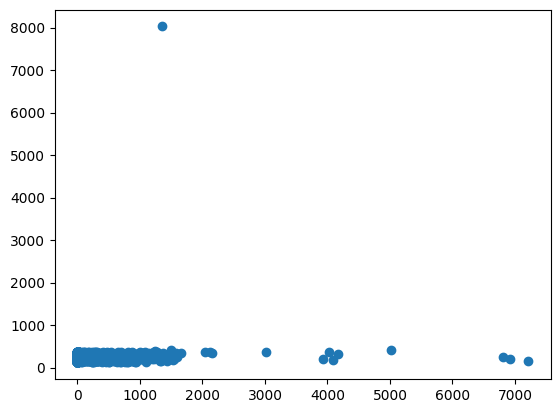

In [133]:
plt.scatter(y_test, predictions)

### predict IV using model_iv
### input : strike price, stock price, option price

In [134]:
test_dataset = pd.read_csv("option-chain-ED-NIFTY-29-Mar-2023.csv")

In [135]:
test_dataset

CALLS  \
NaN OI     CHNG IN OI VOLUME IV     LTP      CHNG   BID QTY BID      ASK      ASK QTY STRIKE    BID QTY  BID      ASK      ASK QTY  CHNG  LTP      IV     VOLUME  CHNG IN OI   
    81     -2         18     380.62 5,981.15 5.50   50      5,947.40 5,987.00 50      11,000.00 29,000   0.20     0.25     1,22,100 -0.10 0.20     248.58 53,553      -1,640   
    3      2          4      366.10 5,005.35 -5.65  100     4,974.25 5,003.55 1,900   12,000.00 1,49,800 0.15     0.20     21,800   -0.15 0.15     201.33 22,492      -1,193   
    5,127  -2,703     4,297  217.98 3,973.10 -54.05 500     3,971.95 3,990.15 50      13,000.00 15,100   0.20     0.30     2,400    -0.25 0.20     160.17 14,005        -363   
    224    -5         35     -      2,967.00 -53.35 200     2,967.45 2,991.10 50      14,000.00 1,70,350 0.20     0.30     97,500   -0.10 0.30     120.11 24,367      -1,433   
...                                                                                                                                                                      ...   
    47,354 5,166      36,722 103.82 0.35     -0.35  7,050   0.35     0.50     16,250  20,000.00 100      3,016.40 3,026.25 50       42.70 3,023.80 -      2,418       -1,105   
    11,556 2,653      9,494  129.85 0.25     -0.35  17,450  0.25     0.45     5,900   21,000.00 250      4,015.80 4,035.75 50       52.65 4,027.25 -      1,798         -944   
    9,893  1,356      6,323  157.35 0.30     -0.30  6,650   0.30     0.35     900     22,000.00 50       5,020.40 5,033.95 100      29.90 5,015.35 199.06 1,462         -686   
    4,993  776        2,621  181.69 0.30     -0.35  15,650  0.30     0.35     1,000   23,000.00 1,800    5,982.55 6,061.25 400      -     -        -      -                -   
    7,772  2,631      6,138  199.63 0.30     -0.25  16,600  0.25     0.35     10,000  24,000.00 1,800    6,976.35 7,077.90 400      -     -        -      -                -   

                                                                                                                                                                 Unnamed: 1  \
NaN OI     CHNG IN OI VOLUME IV     LTP      CHNG   BID QTY BID      ASK      ASK QTY STRIKE    BID QTY  BID      ASK      ASK QTY  CHNG  LTP      IV     VOLUME         OI   
    81     -2         18     380.62 5,981.15 5.50   50      5,947.40 5,987.00 50      11,000.00 29,000   0.20     0.25     1,22,100 -0.10 0.20     248.58 53,553      5,360   
    3      2          4      366.10 5,005.35 -5.65  100     4,974.25 5,003.55 1,900   12,000.00 1,49,800 0.15     0.20     21,800   -0.15 0.15     201.33 22,492      1,980   
    5,127  -2,703     4,297  217.98 3,973.10 -54.05 500     3,971.95 3,990.15 50      13,000.00 15,100   0.20     0.30     2,400    -0.25 0.20     160.17 14,005      7,050   
    224    -5         35     -      2,967.00 -53.35 200     2,967.45 2,991.10 50      14,000.00 1,70,350 0.20     0.30     97,500   -0.10 0.30     120.11 24,367      6,821   
...                                                                                                                                                                     ...   
    47,354 5,166      36,722 103.82 0.35     -0.35  7,050   0.35     0.50     16,250  20,000.00 100      3,016.40 3,026.25 50       42.70 3,023.80 -      2,418       7,543   
    11,556 2,653      9,494  129.85 0.25     -0.35  17,450  0.25     0.45     5,900   21,000.00 250      4,015.80 4,035.75 50       52.65 4,027.25 -      1,798       1,964   
    9,893  1,356      6,323  157.35 0.30     -0.30  6,650   0.30     0.35     900     22,000.00 50       5,020.40 5,033.95 100      29.90 5,015.35 199.06 1,462       2,036   
    4,993  776        2,621  181.69 0.30     -0.35  15,650  0.30     0.35     1,000   23,000.00 1,800    5,982.55 6,061.25 400      -     -        -      -              23   
    7,772  2,631      6,138  199.63 0.30     -0.25  16,600  0.25     0.35     10,000  24,000.00 1,800    6,976.35 7,077.90 400   

In [136]:
test_dataset = test_dataset.dropna()

In [137]:
import csv
with open('option-chain-ED-NIFTY-29-Mar-2023.csv', 'r') as infile, open('LR/output.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    delete_column = -1  # index of the column you want to delete
    
    for row in reader:
        if row[delete_column] == '-':
            del row[delete_column]
        writer.writerow(row)

In [138]:
import csv

with open('LR/output.csv', 'r') as input_file:
    with open('LR/output1.csv', 'w', newline='') as output_file:
        reader = csv.reader(input_file)
        writer = csv.writer(output_file)
        next(reader)  # skip the header row
        for row in reader:
            writer.writerow(row)


In [139]:
test_df = pd.read_csv("LR/output1.csv")
test_df

,Unnamed: 0,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,...,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1,Unnamed: 22
0,NaN,81,-2,18,380.62,"5,981.15",5.50,50,"5,947.40","5,987.00",...,0.20,0.25,"1,22,100",-0.10,0.20,248.58,"53,553","-1,640","5,360",NaN
1,NaN,3,2,4,366.10,"5,005.35",-5.65,100,"4,974.25","5,003.55",...,0.15,0.20,"21,800",-0.15,0.15,201.33,"22,492","-1,193","1,980",NaN
2,NaN,"5,127","-2,703","4,297",217.98,"3,973.10",-54.05,500,"3,971.95","3,990.15",...,0.20,0.30,"2,400",-0.25,0.20,160.17,"14,005",-363,"7,050",NaN
3,NaN,224,-5,35,-,"2,967.00",-53.35,200,"2,967.45","2,991.10",...,0.20,0.30,"97,500",-0.10,0.30,120.11,"24,367","-1,433","6,821",NaN
4,NaN,"7,710","-1,208","3,589",134.17,"1,984.55",-34.55,50,"1,979.00","1,982.75",...,0.20,0.25,"5,450",-0.50,0.25,78.52,"30,022",-367,"24,861",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,NaN,"47,354","5,166","36,722",103.82,0.35,-0.35,"7,050",0.35,0.50,...,"3,016.40","3,026.25",50,42.70,"3,023.80",-,"2,418","-1,105","7,543",NaN
93,NaN,"11,556","2,653","9,494",129.85,0.25,-0.35,"17,450",0.25,0.45,...,"4,015.80","4,035.75",50,52.65,"4,027.25",-,"1,798",-944,"1,964",NaN
94,NaN,"9,893","1,356","6,323",157.35,0.30,-0.30,"6,650",0.30,0.35,...,"5,020.40","5,033.95",100,29.90,"5,015.35",199.06,"1,462",-686,"2,036",NaN
95,NaN,"4,993",776,"2,621",181.69,0.30,-0.35,"15,650",0.30,0.35,...,"5,982.55","6,061.25",400,-,-,-,-,-,23,NaN


In [140]:
Strike_price = list(test_df["STRIKE"])
Stock_price = [16951.70] * len(Strike_price)
Option_price = list(test_df["LTP"])

for i in range(len(Strike_price)):

    tmp = Strike_price[i].split(",")
    Strike_price[i] = float("".join(tmp))

for i in range(len(Option_price)):
    if (Option_price[i] == "-"):
        Option_price[i] = 0
    else:
        tmp = Option_price[i].split(",")
        Option_price[i] = float("".join(tmp))


In [141]:
print (len(Strike_price), Strike_price)
print (len(Stock_price), Stock_price)
print (len(Option_price), Option_price)

97 [11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 15450.0, 15500.0, 15550.0, 15600.0, 15650.0, 15700.0, 15750.0, 15800.0, 15850.0, 15900.0, 15950.0, 16000.0, 16050.0, 16100.0, 16150.0, 16200.0, 16250.0, 16300.0, 16350.0, 16400.0, 16450.0, 16500.0, 16550.0, 16600.0, 16650.0, 16700.0, 16750.0, 16800.0, 16850.0, 16900.0, 16950.0, 17000.0, 17050.0, 17100.0, 17150.0, 17200.0, 17250.0, 17300.0, 17350.0, 17400.0, 17450.0, 17500.0, 17550.0, 17600.0, 17650.0, 17700.0, 17750.0, 17800.0, 17850.0, 17900.0, 17950.0, 18000.0, 18050.0, 18100.0, 18150.0, 18200.0, 18250.0, 18300.0, 18350.0, 18400.0, 18450.0, 18500.0, 18550.0, 18600.0, 18650.0, 18700.0, 18750.0, 18800.0, 18850.0, 18900.0, 18950.0, 19000.0, 19050.0, 19100.0, 19150.0, 19200.0, 19250.0, 19300.0, 19350.0, 19400.0, 19450.0, 19500.0, 19550.0, 19600.0, 19650.0, 19700.0, 19750.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0]
97 [16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16

In [143]:
pred_IV = []


for K, S, O in zip (Strike_price, Stock_price, Option_price):

    data  = [[K, S, O]]

    df = pd.DataFrame(data, columns=["Strike", "Stock", "option_price"])

    # break
                      
    pred_IV.append(model_iv.predict(df))

In [145]:
final_pred_IV = []
final_pred_IV = [float(x) for x in pred_IV]
print (final_pred_IV)

[2.6876979704510013, 2.3020212127962862, 1.8940329540511023, 1.4963803153859132, 1.108075187806457, 0.32369538122402197, 0.8987749131346705, 0.9041107989530035, 0.3236956729719518, 0.3236957702212617, 0.8331648649128169, 0.3236959647198825, 0.784154853295969, 0.32369615921850237, 0.7387020340584689, 0.755381411130946, 0.7124778158493372, 0.6873206581046993, 0.6636061394916863, 0.6477964928327804, 0.6242993581985052, 0.6130152507333264, 0.5939448443933522, 0.5667719443004167, 0.5529385156300384, 0.5343819259670797, 0.5134143503581194, 0.4931186888652572, 0.474641147921842, 0.45584741210026003, 0.43489959867118433, 0.4163430090082265, 0.39812237640331816, 0.38071199317370574, 0.3651987792130802, 0.3505748633472905, 0.3406543462941958, 0.33322386390664427, 0.3286391354225717, 0.3257737165885173, 0.3248252292033351, 0.3244696072147102, 0.3243511313847085, 0.3242326555547068, 0.32413394190459055, 0.3241340391539005, 0.32405508768367053, 0.3240749471128659, 0.32401575782251957, 0.32395656853

## Predicting option price using model_op
### inp: Strike, Stock, IV
### out: option_price

In [146]:
print (len(Strike_price), Strike_price)
print (len(Stock_price), Stock_price)
print (len(final_pred_IV), final_pred_IV)

97 [11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 15450.0, 15500.0, 15550.0, 15600.0, 15650.0, 15700.0, 15750.0, 15800.0, 15850.0, 15900.0, 15950.0, 16000.0, 16050.0, 16100.0, 16150.0, 16200.0, 16250.0, 16300.0, 16350.0, 16400.0, 16450.0, 16500.0, 16550.0, 16600.0, 16650.0, 16700.0, 16750.0, 16800.0, 16850.0, 16900.0, 16950.0, 17000.0, 17050.0, 17100.0, 17150.0, 17200.0, 17250.0, 17300.0, 17350.0, 17400.0, 17450.0, 17500.0, 17550.0, 17600.0, 17650.0, 17700.0, 17750.0, 17800.0, 17850.0, 17900.0, 17950.0, 18000.0, 18050.0, 18100.0, 18150.0, 18200.0, 18250.0, 18300.0, 18350.0, 18400.0, 18450.0, 18500.0, 18550.0, 18600.0, 18650.0, 18700.0, 18750.0, 18800.0, 18850.0, 18900.0, 18950.0, 19000.0, 19050.0, 19100.0, 19150.0, 19200.0, 19250.0, 19300.0, 19350.0, 19400.0, 19450.0, 19500.0, 19550.0, 19600.0, 19650.0, 19700.0, 19750.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0]
97 [16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16951.7, 16

In [147]:
pred_options = []


for K, S, O in zip (Strike_price, Stock_price, final_pred_IV):

    data  = [[K, S, O]]

    df = pd.DataFrame(data, columns=["Strike", "Stock", "IV"])

    # break
                      
    pred_options.append(model_op.predict(df))

In [148]:
final_pred_options = [float(x) for x in pred_options]
print (len(final_pred_options), final_pred_options)

97 [420.44257218834764, 412.54924598862044, 404.19896980454314, 396.0603719568835, 388.11321551099263, 372.0512314082125, 383.82940507989497, 383.9389622335957, 372.05206452801895, 372.05234223462094, 382.4867834456827, 372.0528976478254, 381.48358690035093, 372.0534530610298, 380.5532433197518, 380.8951204832101, 380.01671048740036, 379.5017558378672, 379.01634711291945, 378.6928338651551, 378.21187726583, 377.981049178753, 377.59075404665055, 377.03451605043574, 376.7514766719669, 376.3717047458813, 375.9425546992552, 375.5271657681892, 375.14901279687547, 374.76438400647476, 374.33563869854106, 373.95586677245547, 373.5829754041506, 373.22667832225625, 372.90923615488646, 372.61000722869994, 372.40710611143686, 372.2552020694866, 372.1615803993227, 372.10317099544545, 372.0840212447861, 372.07701365491494, 372.0748629293589, 372.0727122038038, 372.0709662169411, 372.0712439235431, 372.0699026753732, 372.0705851206685, 372.0696486111915, 372.06871210171494, 372.06858506962453, 372.07

## Drawing graph of final predicted options vs actual options

In [149]:
print (len(Option_price), Option_price)
print (len(final_pred_options), final_pred_options)

97 [5981.15, 5005.35, 3973.1, 2967.0, 1984.55, 0, 1455.0, 1468.5, 0, 0, 1289.0, 0, 1165.0, 0, 1050.0, 1092.2, 983.65, 920.0, 860.0, 820.0, 760.55, 732.0, 683.75, 615.0, 580.0, 533.05, 480.0, 428.65, 381.9, 334.35, 281.35, 234.4, 188.3, 144.25, 105.0, 68.0, 42.9, 24.1, 12.5, 5.25, 2.85, 1.95, 1.65, 1.35, 1.1, 1.1, 0.9, 0.95, 0.8, 0.65, 0.6, 0.85, 0.7, 0.75, 0.75, 0.5, 0.6, 0.25, 0.35, 0.5, 0.35, 0.4, 0.35, 0.4, 0.4, 0.45, 0.4, 0.4, 0.45, 0.4, 0.55, 0.55, 0.6, 0.5, 0.6, 0.45, 0.45, 0.4, 0.35, 0.45, 0.4, 0.45, 0.4, 0.6, 0.35, 0.45, 0.25, 0.4, 0.4, 0.4, 0.4, 0.4, 0.35, 0.25, 0.3, 0.3, 0.3]
97 [420.44257218834764, 412.54924598862044, 404.19896980454314, 396.0603719568835, 388.11321551099263, 372.0512314082125, 383.82940507989497, 383.9389622335957, 372.05206452801895, 372.05234223462094, 382.4867834456827, 372.0528976478254, 381.48358690035093, 372.0534530610298, 380.5532433197518, 380.8951204832101, 380.01671048740036, 379.5017558378672, 379.01634711291945, 378.6928338651551, 378.211877265

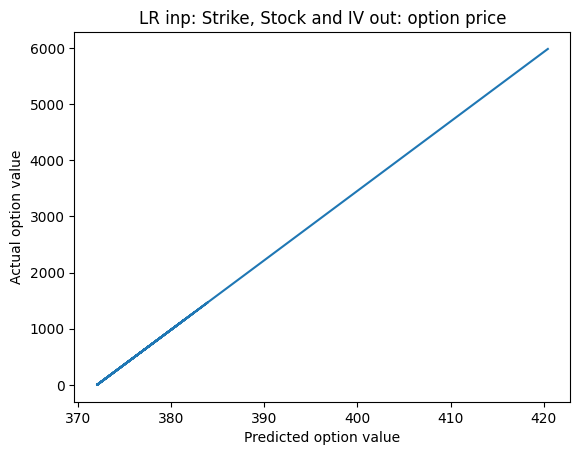

In [150]:
import matplotlib.pyplot as plt 

X = final_pred_options
Y = Option_price

plt.plot(X, Y)

plt.xlabel("Predicted option value")
plt.ylabel("Actual option value")

plt.title("LR inp: Strike, Stock and IV out: option price")

plt.show()

## LR with Time variation data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import csv
with open('bank_50_option_365_CE.csv', 'r') as infile, open('LR_train.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    delete_column = -1  # index of the column you want to delete
    
    for row in reader:
        if row[delete_column] == '-':
            del row[delete_column]
        writer.writerow(row)

In [5]:
dataset = pd.read_csv('LR_train.csv')

In [6]:
Strike_price = list(dataset['Strike Price'])
Strike_price = [float(x) for x in Strike_price]
Stock_price = list(dataset['Underlying Value'])
Time_expiry = []
start_time = list(dataset['Date'])
end_time = list(dataset['Expiry'])
option_price = list(dataset['LTP'])

start_time = [x.replace("-", ":") for x in start_time]
end_time = [x.replace("-", ":") for x in end_time]

dict_month = {
    "Jan":"01",
    "Feb":"02",
    "Mar":"03",
    "Apr":"04",
    "May":"05",
    "Jun":"06",
    "Jul":"07",
    "Aug":"08",
    "Sep":"09",
    "Oct":"10",
    "Nov":"11",
    "Dec":"12",
}
for x in start_time:
    z = x.split(":")
    y = z[0] + ":" + dict_month[z[1]] + ":" + z[2]
    start_time[start_time.index(x)] = y
for x in end_time:
    z = x.split(":")
    y = z[0] + ":" + dict_month[z[1]] + ":" + z[2]
    end_time[end_time.index(x)] = y

from datetime import datetime
start_time = [datetime.strptime(x, '%d:%m:%Y').date()
 for x in start_time]
end_time = [datetime.strptime(x, '%d:%m:%Y').date()
 for x in end_time]

for x, y in zip(end_time, start_time):
    tmp = x - y
    Time_expiry.append(tmp.days)

Time_expiry = [x/365.0 for x in Time_expiry]
Interst = [10/100.0] * len(Strike_price)



In [7]:
print (len(Strike_price), Strike_price)
print (len(Stock_price), Stock_price)
print (len(Time_expiry), Time_expiry)
print (len(option_price), option_price)


5116 [21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 17000.0, 11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 16000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 17000.0, 11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 16000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 17000.0, 11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 16000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 17000.0, 11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 16000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 17000.0, 11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 16000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 20000.0, 11000.0, 12000.0, 13000.0, 14000.0, 15000.0, 16000.0, 17000.0, 17100.0, 17150.0, 17200.0, 17250.0, 17300.0, 17350.0, 17400.0, 17450.0, 21000.0, 22000.0, 23000.0, 24000.0, 17500.0, 17550.0, 17600.0, 17650.0, 17700.0, 17750.0, 17800.0, 17850.0, 17900.0, 17950.0, 18000.0, 18050.0, 18100.0, 18150.0, 1820

In [9]:
IV = []
for C, S, k, T, r in zip(option_price, Stock_price, Strike_price, Time_expiry, Interst):
    iv = str(implied_volatility_call(C, S, k, T, r))
    iv = iv[:4]
    IV.append(float(iv))
    

found on 39th iteration
difference is equal to 7.509676597550197e-05
found on 73th iteration
difference is equal to 9.455519858647676e-05
found on 98th iteration
difference is equal to 8.981507179406378e-05
found on 8th iteration
difference is equal to 6.932644862445159e-05
found on 5th iteration
difference is equal to 2.2038761017029174e-05
found on 18th iteration
difference is equal to 6.16472587324779e-05
found on 52th iteration
difference is equal to 9.90705530057312e-05
found on 81th iteration
difference is equal to 8.985756875290463e-05


C:\Users\yasha\AppData\Local\Temp\ipykernel_21964\4268177965.py:20: RuntimeWarning: overflow encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
C:\Users\yasha\AppData\Local\Temp\ipykernel_21964\4268177965.py:38: RuntimeWarning: overflow encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)
C:\Users\yasha\AppData\Local\Temp\ipykernel_21964\4268177965.py:77: RuntimeWarning: divide by zero encountered in double_scalars
  sigma = sigma - diff / vega(S, K, T, r, sigma)
C:\Users\yasha\AppData\Local\Temp\ipykernel_21964\4268177965.py:20: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
C:\Users\yasha\AppData\Local\Temp\ipykernel_21964\4268177965.py:38: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / sigma * np.sqrt(T)


found on 5th iteration
difference is equal to 1.253521372746036e-05
found on 8th iteration
difference is equal to 3.0055860946731627e-05
found on 20th iteration
difference is equal to 8.343477747985162e-05
found on 25th iteration
difference is equal to 6.866860053378332e-05
found on 56th iteration
difference is equal to 9.45116547654834e-05
found on 81th iteration
difference is equal to 8.664562431093259e-05
found on 7th iteration
difference is equal to 3.274671360031789e-05
found on 6th iteration
difference is equal to 8.483663259539753e-05
found on 24th iteration
difference is equal to 6.141062940656639e-05
found on 54th iteration
difference is equal to 9.972430734705995e-05
found on 98th iteration
difference is equal to 9.561751434183918e-05
found on 8th iteration
difference is equal to 8.735218830224767e-05
found on 5th iteration
difference is equal to 8.712755516171455e-05
found on 21th iteration
difference is equal to 6.351967654438795e-05
found on 55th iteration
difference is eq

C:\Users\yasha\AppData\Local\Temp\ipykernel_21964\4268177965.py:77: RuntimeWarning: overflow encountered in double_scalars
  sigma = sigma - diff / vega(S, K, T, r, sigma)


found on 14th iteration
difference is equal to -4.047623406222556e-05
found on 15th iteration
difference is equal to -7.16338640813774e-05
found on 83th iteration
difference is equal to -8.353922203241382e-05
found on 91th iteration
difference is equal to 9.183445394000955e-05
found on 57th iteration
difference is equal to 8.922273182188079e-05
found on 65th iteration
difference is equal to 8.710836476666373e-05
found on 77th iteration
difference is equal to 8.924372956453652e-05
found on 22th iteration
difference is equal to 6.839022617022295e-05
found on 29th iteration
difference is equal to 8.4300504886059e-05
found on 38th iteration
difference is equal to 7.603516721665926e-05
found on 48th iteration
difference is equal to 9.172917955346804e-05
found on 7th iteration
difference is equal to 2.680514080566354e-05
found on 9th iteration
difference is equal to 8.019498081779375e-05
found on 12th iteration
difference is equal to 8.199037511147367e-05
found on 16th iteration
difference i

In [11]:
print (len(IV), IV)

5116 [0.14, 0.15, 0.18, 0.2, 0.11, 0.12, nan, -0.3, -0.2, nan, nan, nan, nan, 0.11, 0.14, 0.17, 0.19, 0.22, 0.13, 0.12, 0.12, -0.3, -0.2, nan, nan, nan, nan, 0.12, 0.13, 0.16, 0.19, 0.21, 0.11, 0.11, nan, -0.3, -0.2, nan, nan, nan, nan, 0.11, 0.12, 0.15, 0.18, 0.21, 0.11, 0.11, nan, -0.3, -0.2, nan, nan, nan, nan, 0.11, 0.13, 0.15, 0.19, 0.21, 0.11, 0.11, nan, -0.3, -0.2, nan, nan, nan, nan, 0.11, 0.12, 0.15, 0.18, 0.21, 0.1, 0.11, 0.11, nan, -0.3, nan, nan, nan, nan, nan, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.13, 0.15, 0.19, 0.22, 0.09, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.11, -0.0, 0.13, -0.0, 0.11, -0.0, 0.07, -0.0, 0.12, -0.0, 0.11, -5.8, 0.11, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.11, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.11, 0.03, 0.03, 0.03, 0.04, 0.11, nan, -0.3, nan, nan, nan, nan, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, nan, -0.0, -0.0, -0.0, -0.0, -0.0, nan, nan, nan, nan, nan, -0.3, 0.19, 0.22, 0.1, 0.13, 0.15, 0.03, 0.03, 0.03

In [12]:
f = open("LR_train_02.csv", "w")

header = ["Strike", "Stock", "option_price", "IV", "Time"]

writer = csv.writer(f)

writer.writerow(header)


35

In [13]:
for strike, stock, option, iv, t in zip(Strike_price, Stock_price, option_price, IV, Time_expiry):
    if (str(iv) != "nan"):
        if (str(iv) != "-inf"):
            ls = [strike, stock, option, iv, t]
            writer.writerow(ls)


In [14]:
f.close()

In [15]:
dataset = pd.read_csv("LR_train_02.csv")

In [16]:
dataset

,Strike,Stock,option_price,IV,Time
0,21000.0,18127.35,27.60,0.14,0.265753
1,22000.0,18127.35,12.25,0.15,0.265753
2,23000.0,18127.35,9.40,0.18,0.265753
3,24000.0,18127.35,6.85,0.20,0.265753
4,18000.0,18127.35,789.10,0.11,0.265753
...,...,...,...,...,...
4373,16900.0,16945.05,133.00,0.12,0.013699
4374,16950.0,16945.05,106.45,0.12,0.013699
4375,17000.0,16945.05,83.00,0.12,0.013699
4376,17050.0,16945.05,63.20,0.12,0.013699


### Graph of time vs volatality

In [55]:
# Chekcing for strike price 21000

strike = list(dataset["Strike"])
time = list(dataset["Time"])

x = []
y = []

count = 0
for i in range(len(strike)):
    if strike[i] == 21000:
        count += 1
        x.append(strike[i])
        y.append(time[i])

# Chekcing for strike price 21000

strike = list(dataset["Strike"])
time = list(dataset["Time"])
iv = list(dataset["IV"])

x = []
y = []

count = 0
for i in range(len(strike)):
    if strike[i] == 21000:
        count += 1
        x.append(IV[i])
        y.append(time[i])

# Strike : 22000
x1 = []
y1 = []

count = 0
for i in range(len(strike)):
    if strike[i] == 22000:
        count += 1
        x1.append(IV[i])
        y1.append(time[i])

# Strike : 19000
x2 = []
y2 = []

count = 0
for i in range(len(strike)):
    if strike[i] == 19000:
        count += 1
        x2.append(IV[i])
        y2.append(time[i])




In [56]:
# 21000
for i in range(len(x)):
    
    if str(x[i]) == "nan":
        x[i] = 0
    elif str(x[i]) == "-inf":
        x[i] = 0


In [57]:
print (x)

[0.14, 0, 0.12, 0.13, 0, 0.11, 0, 0.01, -0.0, 0.0, 0.02, 0.03, 0.05, 0.2, -0.0, 0, -0.0, -0.0, -0.0, 0.11, 0.09, -0.0, -0.0, 0.1, 0.05, 0, 0.05, 0.13, 0.05, 0.13, 0, -0.0, 0.12, 0.04, 0, 0.05, 0.1, 0.09, 0.18, -0.0, 0.07, 0.09, 0.06, -0.4, 0.06, 0, 0.05, 0.1, 0.09, 0.12, 0.16, 0, 0.09, 0.1, 0.11, 0.12, 0.13, -0.5, 0.09, 0.09, 0.1, 0.1, 0.14, 0.15]


In [58]:
# 22000
for i in range(len(x1)):
    
    if str(x1[i]) == "nan":
        x1[i] = 0
    elif str(x1[i]) == "-inf":
        x1[i] = 0


In [59]:
# 19000
for i in range(len(x2)):
    
    if str(x2[i]) == "nan":
        x2[i] = 0
    elif str(x2[i]) == "-inf":
        x2[i] = 0


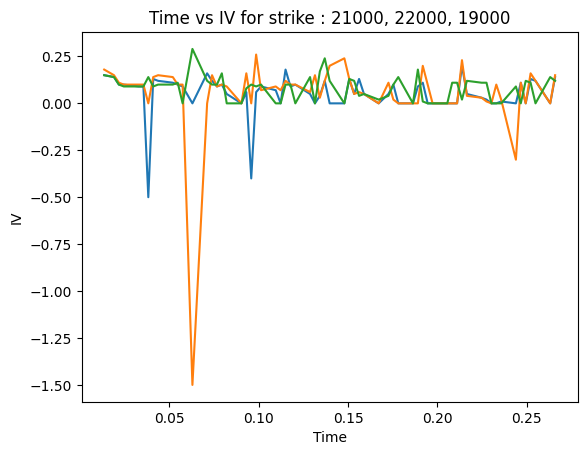

In [60]:
import matplotlib.pyplot as plt 

X =x
Y =y
X1 = x1
Y1 = y1
X2 = x2
Y2 = y2


plt.plot(Y, X, label = "Strike 21000")
plt.plot(Y1, X1, label = "Strike 22000")
plt.plot(Y2, X2, label = "Strike 19000")

plt.ylabel("IV")
plt.xlabel("Time")

plt.title("Time vs IV for strike : 21000, 22000, 19000")

plt.show()

## Graph of underlying price with time

In [68]:
x = list(dataset["Strike"])
y = list(dataset["Time"])
z = list(dataset["Stock"])

underlying = []
time = []

for i in range(len(x)):
    if x[i] == 21000:
        underlying.append(z[i])
        time.append(y[i])

In [71]:
x = list(dataset["Strike"])
y = list(dataset["Time"])
z = list(dataset["Stock"])

underlying1 = []
time1 = []

for i in range(len(x)):
    if x[i] == 22000:
        underlying1.append(z[i])
        time1.append(y[i])

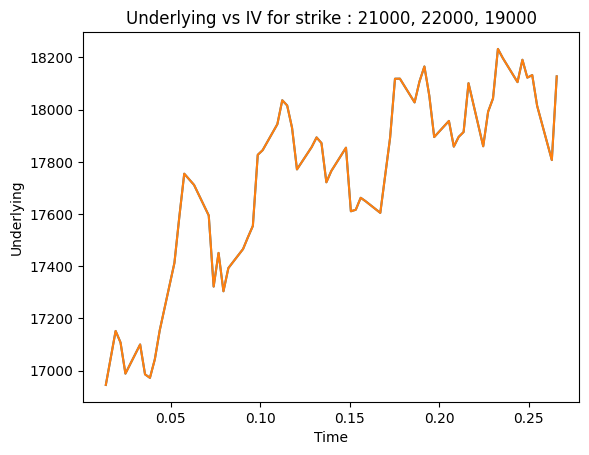

In [72]:
import matplotlib.pyplot as plt 

X = underlying
Y = time
X1 = underlying1
Y1 = time1



plt.plot(Y, X, label = "Strike 21000")
plt.plot(Y1, X1, label = "Strike 22000")

plt.ylabel("Underlying")
plt.xlabel("Time")

plt.title("Underlying vs time for strike : 21000, 22000, 19000")

plt.show()

## Graph IV vs underlying fpr 21000, 22000, 19000

In [73]:
x = list(dataset["Strike"])
y = list(dataset["Stock"])
z = list(dataset["IV"])

underlying = []
IV = []

for i in range(len(x)):
    if x[i] == 21000:
        underlying.append(y[i])
        IV.append(z[i])

In [75]:
x = list(dataset["Strike"])
y = list(dataset["Stock"])
z = list(dataset["IV"])

# for 22000

underlying1 = []
IV1 = []

for i in range(len(x)):
    if x[i] == 22000:
        underlying1.append(y[i])
        IV1.append(z[i])

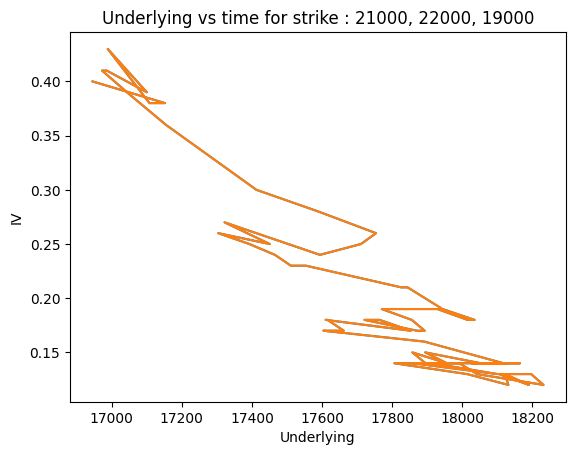

In [76]:
import matplotlib.pyplot as plt 

X = underlying
Y = IV
X1 = underlying1
Y1 = IV1




plt.plot(X, Y, label = "Strike 21000")
plt.plot(X, Y, label = "Strike 22000")

plt.ylabel("IV")
plt.xlabel("Underlying")

plt.title("Underlying vs time for strike : 21000, 22000, 19000")

plt.show()

### Building Linear model with strike, stock and time in, out volatality

In [2]:
import pandas as pd
dataset = pd.read_csv("LR_train_02.csv")

In [3]:
dataset

,Strike,Stock,option_price,IV,Time
0,21000.0,18127.35,27.60,0.14,0.265753
1,22000.0,18127.35,12.25,0.15,0.265753
2,23000.0,18127.35,9.40,0.18,0.265753
3,24000.0,18127.35,6.85,0.20,0.265753
4,18000.0,18127.35,789.10,0.11,0.265753
...,...,...,...,...,...
4373,16900.0,16945.05,133.00,0.12,0.013699
4374,16950.0,16945.05,106.45,0.12,0.013699
4375,17000.0,16945.05,83.00,0.12,0.013699
4376,17050.0,16945.05,63.20,0.12,0.013699


In [4]:
Strike = list(dataset["Strike"])
Stock = list(dataset["Stock"])
Time = list(dataset["Time"])
IV = list(dataset["IV"])

In [5]:
print (len(Strike), Strike)
print (len(Stock), Stock)
print (len(Time), Time)
print (len(IV), IV)

4378 [21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 11000.0, 12000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 17000.0, 11000.0, 12000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 11000.0, 12000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 11000.0, 12000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 11000.0, 12000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 18000.0, 19000.0, 20000.0, 12000.0, 17100.0, 17150.0, 17200.0, 17250.0, 17300.0, 17350.0, 17400.0, 17450.0, 21000.0, 22000.0, 23000.0, 24000.0, 17500.0, 17550.0, 17600.0, 17650.0, 17700.0, 17750.0, 17800.0, 17850.0, 17900.0, 17950.0, 18000.0, 18050.0, 18100.0, 18150.0, 18200.0, 18250.0, 18300.0, 18350.0, 18400.0, 18450.0, 18500.0, 18550.0, 18600.0, 18650.0, 18700.0, 18750.0, 18800.0, 18850.0, 18900.0, 18950.0, 19000.0, 19050.0, 19100.0, 19150.0, 19200.0, 19250.0, 19300.0, 19350.0, 19400.0, 19450.0, 19500.0, 19550.0, 19600.0, 19650.0, 1970

In [6]:
x = dataset[['Strike', 'Stock', 'Time']]
y = dataset[['IV']]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [8]:
from sklearn.linear_model import LinearRegression

model_iv = LinearRegression()

model_iv.fit(x_train, y_train)

print(model_op.coef_)

print(model_op.intercept_)

NameError: name 'model_op' is not defined

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score

# Calculate the MAE of the predictions
mae = mean_absolute_error(y_test, y_pred)

# Calculate the MSE of the predictions
mse = mean_squared_error(y_test, y_pred)

# Calculate the RMSE of the predictions
rmse = np.sqrt(mse)

# Calculate the R^2 of the predictions
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


In [95]:
predictions = model_iv.predict(x_test)

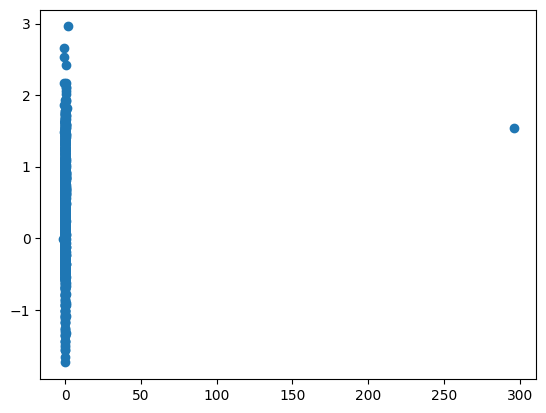

In [96]:
plt.scatter(y_test, predictions)

## Use heston model to predict options
input: predicted IV, strike, stock, time 
output: option price

In [97]:
x = dataset[['Strike', 'Stock', 'IV', 'Time']]
y = dataset[['option_price']]

In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [99]:
from sklearn.linear_model import LinearRegression

model_op = LinearRegression()

model_op.fit(x_train, y_train)

print(model_op.coef_)

print(model_op.intercept_)

[[-1.40858846e-01  8.99983585e-02  5.58934004e+00 -1.00591275e+03]]
[1327.13906532]


In [100]:
predictions = model_op.predict(x_test)

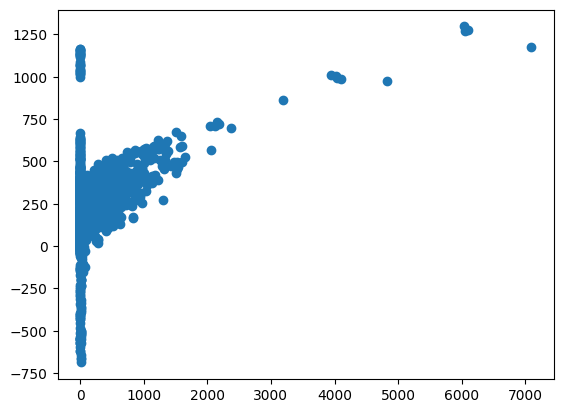

In [101]:
plt.scatter(y_test, predictions)

# Testing

## First predicting IV from test data

In [7]:
import pandas as pd
test_dataset = pd.read_csv("option-chain-ED-NIFTY-29-Mar-2023.csv")

In [8]:
test_dataset

CALLS  \
NaN OI     CHNG IN OI VOLUME IV     LTP      CHNG   BID QTY BID      ASK      ASK QTY STRIKE    BID QTY  BID      ASK      ASK QTY  CHNG  LTP      IV     VOLUME  CHNG IN OI   
    81     -2         18     380.62 5,981.15 5.50   50      5,947.40 5,987.00 50      11,000.00 29,000   0.20     0.25     1,22,100 -0.10 0.20     248.58 53,553      -1,640   
    3      2          4      366.10 5,005.35 -5.65  100     4,974.25 5,003.55 1,900   12,000.00 1,49,800 0.15     0.20     21,800   -0.15 0.15     201.33 22,492      -1,193   
    5,127  -2,703     4,297  217.98 3,973.10 -54.05 500     3,971.95 3,990.15 50      13,000.00 15,100   0.20     0.30     2,400    -0.25 0.20     160.17 14,005        -363   
    224    -5         35     -      2,967.00 -53.35 200     2,967.45 2,991.10 50      14,000.00 1,70,350 0.20     0.30     97,500   -0.10 0.30     120.11 24,367      -1,433   
...                                                                                                                                                                      ...   
    47,354 5,166      36,722 103.82 0.35     -0.35  7,050   0.35     0.50     16,250  20,000.00 100      3,016.40 3,026.25 50       42.70 3,023.80 -      2,418       -1,105   
    11,556 2,653      9,494  129.85 0.25     -0.35  17,450  0.25     0.45     5,900   21,000.00 250      4,015.80 4,035.75 50       52.65 4,027.25 -      1,798         -944   
    9,893  1,356      6,323  157.35 0.30     -0.30  6,650   0.30     0.35     900     22,000.00 50       5,020.40 5,033.95 100      29.90 5,015.35 199.06 1,462         -686   
    4,993  776        2,621  181.69 0.30     -0.35  15,650  0.30     0.35     1,000   23,000.00 1,800    5,982.55 6,061.25 400      -     -        -      -                -   
    7,772  2,631      6,138  199.63 0.30     -0.25  16,600  0.25     0.35     10,000  24,000.00 1,800    6,976.35 7,077.90 400      -     -        -      -                -   

                                                                                                                                                                 Unnamed: 1  \
NaN OI     CHNG IN OI VOLUME IV     LTP      CHNG   BID QTY BID      ASK      ASK QTY STRIKE    BID QTY  BID      ASK      ASK QTY  CHNG  LTP      IV     VOLUME         OI   
    81     -2         18     380.62 5,981.15 5.50   50      5,947.40 5,987.00 50      11,000.00 29,000   0.20     0.25     1,22,100 -0.10 0.20     248.58 53,553      5,360   
    3      2          4      366.10 5,005.35 -5.65  100     4,974.25 5,003.55 1,900   12,000.00 1,49,800 0.15     0.20     21,800   -0.15 0.15     201.33 22,492      1,980   
    5,127  -2,703     4,297  217.98 3,973.10 -54.05 500     3,971.95 3,990.15 50      13,000.00 15,100   0.20     0.30     2,400    -0.25 0.20     160.17 14,005      7,050   
    224    -5         35     -      2,967.00 -53.35 200     2,967.45 2,991.10 50      14,000.00 1,70,350 0.20     0.30     97,500   -0.10 0.30     120.11 24,367      6,821   
...                                                                                                                                                                     ...   
    47,354 5,166      36,722 103.82 0.35     -0.35  7,050   0.35     0.50     16,250  20,000.00 100      3,016.40 3,026.25 50       42.70 3,023.80 -      2,418       7,543   
    11,556 2,653      9,494  129.85 0.25     -0.35  17,450  0.25     0.45     5,900   21,000.00 250      4,015.80 4,035.75 50       52.65 4,027.25 -      1,798       1,964   
    9,893  1,356      6,323  157.35 0.30     -0.30  6,650   0.30     0.35     900     22,000.00 50       5,020.40 5,033.95 100      29.90 5,015.35 199.06 1,462       2,036   
    4,993  776        2,621  181.69 0.30     -0.35  15,650  0.30     0.35     1,000   23,000.00 1,800    5,982.55 6,061.25 400      -     -        -      -              23   
    7,772  2,631      6,138  199.63 0.30     -0.25  16,600  0.25     0.35     10,000  24,000.00 1,800    6,976.35 7,077.90 400   

In [9]:
test_dataset = test_dataset.dropna()

In [10]:
import csv
with open('option-chain-ED-NIFTY-06-Apr-2023.csv', 'r') as infile, open('LR/output.csv', 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    delete_column = -1  # index of the column you want to delete
    
    for row in reader:
        if row[delete_column] == '-':
            del row[delete_column]
        writer.writerow(row)

In [5]:
import csv

with open('LR/output.csv', 'r') as input_file:
    with open('LR/output1.csv', 'w', newline='') as output_file:
        reader = csv.reader(input_file)
        writer = csv.writer(output_file)
        next(reader)  # skip the header row
        for row in reader:
            writer.writerow(row)


In [6]:
test_df = pd.read_csv("LR/output1.csv")
test_df

,Unnamed: 0,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,...,BID.1,ASK.1,ASK QTY.1,CHNG.1,LTP.1,IV.1,VOLUME.1,CHNG IN OI.1,OI.1,Unnamed: 22
0,NaN,-,-,-,-,-,-,"1,500","1,545.60","1,897.40",...,1.65,1.90,"6,100",0.05,1.90,-,"3,974","1,970","2,865",NaN
1,NaN,17,2,5,-,"1,610.00",80.00,"1,750","1,483.45","1,795.70",...,2.05,2.15,500,-,2.05,-,"57,098","28,798","34,249",NaN
2,NaN,-,-,-,-,-,-,"1,500","1,451.30","1,743.60",...,1.90,2.20,300,-0.20,1.90,-,"3,292",778,966,NaN
3,NaN,-,-,-,-,-,-,"1,500","1,402.95","1,668.95",...,2.25,2.35,400,0.05,2.25,-,"24,224","11,722","12,254",NaN
4,NaN,-,-,-,-,-,-,"1,500","1,355.85","1,766.50",...,1.05,4.90,"1,750",2.55,4.90,-,579,35,212,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NaN,92,49,58,27.50,1.15,-0.15,"1,400",1.10,1.50,...,"1,577.20","2,026.25","1,000",-,-,-,-,-,-,NaN
73,NaN,"3,190","3,030","5,279",-,1.15,-0.25,800,1.10,1.15,...,"1,613.15","2,076.70","1,500",-,-,-,-,-,-,NaN
74,NaN,513,393,511,-,1.20,-0.15,200,1.15,1.20,...,"1,654.60","2,128.50","1,500",-,-,-,-,-,-,NaN
75,NaN,"5,555","5,178","7,454",-,1.15,-0.30,500,1.10,1.15,...,"1,812.65","2,167.70","2,500",-,-,-,-,-,1,NaN


In [111]:
Strike_price = list(test_df["STRIKE"])
Stock_price = [17080.70] * len(Strike_price)
Option_price = list(test_df["LTP"])
Time_expire = [7/365.0] * len(Strike_price)

for i in range(len(Strike_price)):

    tmp = Strike_price[i].split(",")
    Strike_price[i] = float("".join(tmp))

for i in range(len(Option_price)):
    if (Option_price[i] == "-"):
        Option_price[i] = 0
    else:
        tmp = Option_price[i].split(",")
        Option_price[i] = float("".join(tmp))


In [112]:
print (len(Strike_price), Strike_price)
print (len(Stock_price), Stock_price)
print (len(Option_price), Option_price)

77 [15450.0, 15500.0, 15550.0, 15600.0, 15650.0, 15700.0, 15750.0, 15800.0, 15850.0, 15900.0, 15950.0, 16000.0, 16050.0, 16100.0, 16150.0, 16200.0, 16250.0, 16300.0, 16350.0, 16400.0, 16450.0, 16500.0, 16550.0, 16600.0, 16650.0, 16700.0, 16750.0, 16800.0, 16850.0, 16900.0, 16950.0, 17000.0, 17050.0, 17100.0, 17150.0, 17200.0, 17250.0, 17300.0, 17350.0, 17400.0, 17450.0, 17500.0, 17550.0, 17600.0, 17650.0, 17700.0, 17750.0, 17800.0, 17850.0, 17900.0, 17950.0, 18000.0, 18050.0, 18100.0, 18150.0, 18200.0, 18250.0, 18300.0, 18350.0, 18400.0, 18450.0, 18500.0, 18550.0, 18600.0, 18650.0, 18700.0, 18750.0, 18800.0, 18850.0, 18900.0, 18950.0, 19000.0, 19050.0, 19100.0, 19150.0, 19200.0, 19250.0]
77 [17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17

# Predict IVs

In [113]:
pred_IV = []


for K, S, O in zip (Strike_price, Stock_price, Time_expire):

    data  = [[K, S, O]]

    df = pd.DataFrame(data, columns=["Strike", "Stock", "Time"])

    # break
                      
    pred_IV.append(model_iv.predict(df))

In [115]:
final_pred_IV = []
final_pred_IV = [float(x) for x in pred_IV]
print (final_pred_IV)

[1.734595151885923, 1.72251033174485, 1.710425511603777, 1.698340691462704, 1.6862558713216274, 1.6741710511805543, 1.6620862310394813, 1.6500014108984047, 1.6379165907573316, 1.6258317706162586, 1.6137469504751856, 1.601662130334109, 1.589577310193036, 1.577492490051963, 1.5654076699108863, 1.5533228497698133, 1.5412380296287402, 1.5291532094876636, 1.5170683893465906, 1.5049835692055176, 1.492898749064441, 1.480813928923368, 1.468729108782295, 1.4566442886412183, 1.4445594685001453, 1.4324746483590722, 1.4203898282179992, 1.4083050080769226, 1.3962201879358496, 1.3841353677947765, 1.3720505476537035, 1.359965727512627, 1.3478809073715539, 1.3357960872304808, 1.3237112670894042, 1.3116264469483312, 1.2995416268072582, 1.2874568066661816, 1.2753719865251085, 1.2632871663840355, 1.251202346242959, 1.2391175261018859, 1.2270327059608128, 1.2149478858197362, 1.2028630656786632, 1.1907782455375902, 1.1786934253965136, 1.1666086052554405, 1.1545237851143675, 1.1424389649732944, 1.1303541448

## Predicting option price using predicted IVs

In [116]:
print (len(Strike_price), Strike_price)
print (len(Stock_price), Stock_price)
print (len(final_pred_IV), final_pred_IV)
print (len(Time_expire), Time_expire)

77 [15450.0, 15500.0, 15550.0, 15600.0, 15650.0, 15700.0, 15750.0, 15800.0, 15850.0, 15900.0, 15950.0, 16000.0, 16050.0, 16100.0, 16150.0, 16200.0, 16250.0, 16300.0, 16350.0, 16400.0, 16450.0, 16500.0, 16550.0, 16600.0, 16650.0, 16700.0, 16750.0, 16800.0, 16850.0, 16900.0, 16950.0, 17000.0, 17050.0, 17100.0, 17150.0, 17200.0, 17250.0, 17300.0, 17350.0, 17400.0, 17450.0, 17500.0, 17550.0, 17600.0, 17650.0, 17700.0, 17750.0, 17800.0, 17850.0, 17900.0, 17950.0, 18000.0, 18050.0, 18100.0, 18150.0, 18200.0, 18250.0, 18300.0, 18350.0, 18400.0, 18450.0, 18500.0, 18550.0, 18600.0, 18650.0, 18700.0, 18750.0, 18800.0, 18850.0, 18900.0, 18950.0, 19000.0, 19050.0, 19100.0, 19150.0, 19200.0, 19250.0]
77 [17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17080.7, 17

In [117]:
pred_options = []


for K, S, O, T in zip (Strike_price, Stock_price, final_pred_IV, Time_expire):

    data  = [[K, S, O, T]]

    df = pd.DataFrame(data, columns=["Strike", "Stock", "IV", "Time"])

    # break
                      
    pred_options.append(model_op.predict(df))

In [118]:
final_pred_options = [float(x) for x in pred_options]
print (len(final_pred_options), final_pred_options)

77 [678.5086152187744, 671.3981267301028, 664.2876382414312, 657.1771497527601, 650.0666612640885, 642.9561727754169, 635.8456842867453, 628.7351957980741, 621.6247073094025, 614.514218820731, 607.4037303320598, 600.2932418433882, 593.1827533547166, 586.072264866045, 578.9617763773739, 571.8512878887022, 564.7407994000307, 557.6303109113595, 550.519822422688, 543.4093339340163, 536.2988454453448, 529.1883569566736, 522.0778684680021, 514.9673799793304, 507.8568914906592, 500.7464030019877, 493.63591451331604, 486.5254260246445, 479.4149375359733, 472.3044490473018, 465.1939605586301, 458.08347206995904, 450.9729835812874, 443.86249509261586, 436.7520066039442, 429.64151811527313, 422.5310296266015, 415.42054113792983, 408.31005264925875, 401.1995641605871, 394.08907567191557, 386.9785871832439, 379.86809869457284, 372.7576102059012, 365.64712171722965, 358.53663322855846, 351.4261447398869, 344.3156562512153, 337.20516776254374, 330.09467927387254, 322.984190785201, 315.87370229652936,

In [119]:
print (len(Option_price), Option_price)
print (len(final_pred_options), final_pred_options)

77 [0, 1610.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1144.0, 0, 922.3, 855.0, 830.1, 841.0, 819.7, 0, 743.0, 690.0, 649.0, 0, 552.2, 498.15, 460.0, 407.05, 366.0, 315.05, 273.35, 237.0, 197.5, 161.85, 132.0, 103.5, 79.4, 58.85, 42.0, 28.3, 19.6, 12.8, 8.4, 5.15, 3.55, 3.65, 2.6, 2.45, 2.1, 2.0, 1.7, 1.95, 1.45, 1.45, 1.45, 1.4, 1.35, 1.25, 1.25, 1.3, 1.4, 1.15, 1.3, 1.05, 1.4, 1.7, 1.45, 1.1, 1.2, 1.15, 1.3, 1.2, 1.2, 1.15, 1.15, 1.2, 1.15, 1.05]
77 [678.5086152187744, 671.3981267301028, 664.2876382414312, 657.1771497527601, 650.0666612640885, 642.9561727754169, 635.8456842867453, 628.7351957980741, 621.6247073094025, 614.514218820731, 607.4037303320598, 600.2932418433882, 593.1827533547166, 586.072264866045, 578.9617763773739, 571.8512878887022, 564.7407994000307, 557.6303109113595, 550.519822422688, 543.4093339340163, 536.2988454453448, 529.1883569566736, 522.0778684680021, 514.9673799793304, 507.8568914906592, 500.7464030019877, 493.63591451331604, 486.5254260246445, 479.4149375359733, 472.304

In [123]:
new_option_price = []
new_final_pred_options = []
count = 0
for i in range(len(Option_price)):
    if Option_price[i] != 0:
        new_option_price.append(Option_price[i])
        new_final_pred_options.append(final_pred_options[i])

print (len(new_option_price), new_option_price)
print (len(new_final_pred_options), new_final_pred_options) 


64 [1610.0, 1144.0, 922.3, 855.0, 830.1, 841.0, 819.7, 743.0, 690.0, 649.0, 552.2, 498.15, 460.0, 407.05, 366.0, 315.05, 273.35, 237.0, 197.5, 161.85, 132.0, 103.5, 79.4, 58.85, 42.0, 28.3, 19.6, 12.8, 8.4, 5.15, 3.55, 3.65, 2.6, 2.45, 2.1, 2.0, 1.7, 1.95, 1.45, 1.45, 1.45, 1.4, 1.35, 1.25, 1.25, 1.3, 1.4, 1.15, 1.3, 1.05, 1.4, 1.7, 1.45, 1.1, 1.2, 1.15, 1.3, 1.2, 1.2, 1.15, 1.15, 1.2, 1.15, 1.05]
64 [671.3981267301028, 600.2932418433882, 586.072264866045, 578.9617763773739, 571.8512878887022, 564.7407994000307, 557.6303109113595, 543.4093339340163, 536.2988454453448, 529.1883569566736, 514.9673799793304, 507.8568914906592, 500.7464030019877, 493.63591451331604, 486.5254260246445, 479.4149375359733, 472.3044490473018, 465.1939605586301, 458.08347206995904, 450.9729835812874, 443.86249509261586, 436.7520066039442, 429.64151811527313, 422.5310296266015, 415.42054113792983, 408.31005264925875, 401.1995641605871, 394.08907567191557, 386.9785871832439, 379.86809869457284, 372.7576102059012,

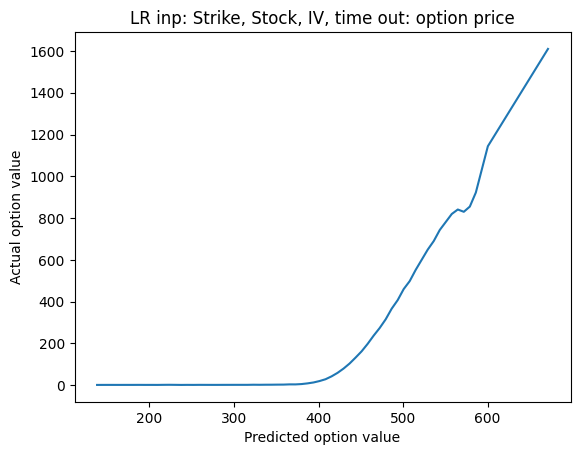

In [125]:
import matplotlib.pyplot as plt 

X = new_final_pred_options
Y = new_option_price

plt.plot(X, Y)

plt.xlabel("Predicted option value")
plt.ylabel("Actual option value")

plt.title("LR inp: Strike, Stock, IV, time out: option price")

plt.show()

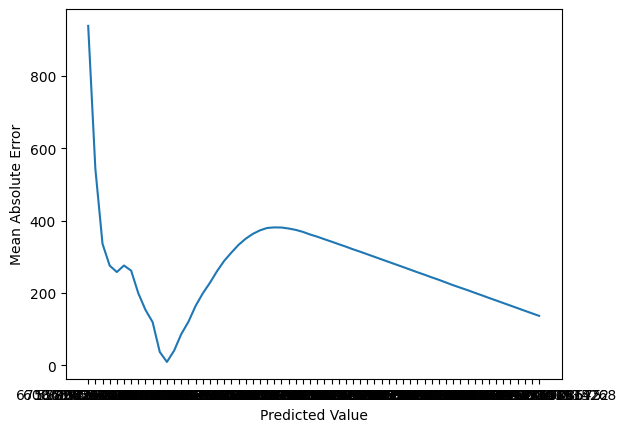

In [127]:
# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = new_option_price
# predicted value
predicted = new_final_pred_options
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = abs((expected[i] - predicted[i]))
	# store error
	errors.append(err)
	# report error
	# print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show()

## Saving models

In [128]:

# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

In [129]:
filename = 'LR/model_iv.sav'
pickle.dump(model_iv, open(filename, 'wb'))


In [130]:
filename = 'LR/model_op.sav'
pickle.dump(model_op, open(filename, 'wb'))

## To load model

In [131]:
loaded_model = pickle.load(open("LR/model_iv.sav", 'rb'))

## Plotting a graph to dispay volatality movement for a strike price along time

In [1]:
# Save Model Using Pickle
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
IV_model = pickle.load(open("LR/model_iv.sav", 'rb'))

In [34]:
Strike_price = 16600
Stock_price = 17764.45
time = [x/365.0 for x in range(1, 90)]

time.sort(reverse=True)


In [35]:
print (time)

[0.24383561643835616, 0.2410958904109589, 0.23835616438356164, 0.2356164383561644, 0.2328767123287671, 0.23013698630136986, 0.2273972602739726, 0.22465753424657534, 0.2219178082191781, 0.2191780821917808, 0.21643835616438356, 0.2136986301369863, 0.21095890410958903, 0.20821917808219179, 0.2054794520547945, 0.20273972602739726, 0.2, 0.19726027397260273, 0.19452054794520549, 0.1917808219178082, 0.18904109589041096, 0.1863013698630137, 0.18356164383561643, 0.18082191780821918, 0.1780821917808219, 0.17534246575342466, 0.1726027397260274, 0.16986301369863013, 0.16712328767123288, 0.1643835616438356, 0.16164383561643836, 0.1589041095890411, 0.15616438356164383, 0.15342465753424658, 0.1506849315068493, 0.14794520547945206, 0.14520547945205478, 0.14246575342465753, 0.13972602739726028, 0.136986301369863, 0.13424657534246576, 0.13150684931506848, 0.12876712328767123, 0.12602739726027398, 0.1232876712328767, 0.12054794520547946, 0.1178082191780822, 0.11506849315068493, 0.11232876712328767, 0.109

In [36]:
pred_IV = []


for t in time:

    data  = [[Strike_price, Stock_price, t]]

    df = pd.DataFrame(data, columns=["Strike", "Stock", "Time"])

    # break
                      
    pred_IV.append(IV_model.predict(df))
    
final_pred_IV = []
final_pred_IV = [float(x) for x in pred_IV]

In [37]:
time = [x*365.0 for x in time]

[89.0, 88.0, 87.0, 86.0, 85.0, 84.0, 83.0, 82.0, 81.0, 80.0, 79.0, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 70.0, 69.0, 68.0, 67.0, 66.0, 65.0, 64.0, 63.00000000000001, 62.0, 61.0, 60.0, 59.0, 58.00000000000001, 57.0, 56.0, 55.0, 54.0, 52.99999999999999, 52.0, 51.0, 50.0, 49.0, 47.99999999999999, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 29.000000000000004, 28.0, 27.0, 26.0, 25.0, 23.999999999999996, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 11.999999999999998, 11.0, 10.0, 9.0, 8.0, 7.0, 5.999999999999999, 5.0, 4.0, 2.9999999999999996, 2.0, 1.0]


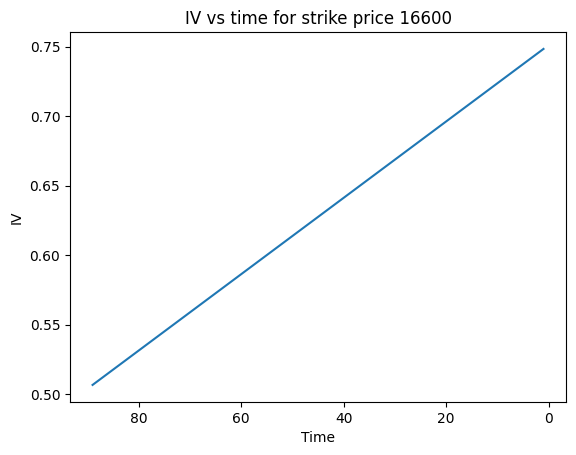

In [44]:
import matplotlib.pyplot as plt 

X = final_pred_IV
Y = time

plt.plot(Y, X)

plt.xlabel("Time")
plt.ylabel("IV")

plt.gca().invert_xaxis()

plt.title("IV vs time for strike price 16600")

plt.show()

In [23]:
options_model = pickle.load(open("LR/model_op.sav", 'rb'))

In [27]:
pred_options = []


for O, T in zip (final_pred_IV, time):

    data  = [[Strike_price, Stock_price, O, T]]

    df = pd.DataFrame(data, columns=["Strike", "Stock", "IV", "Time"])

    # break
                      
    pred_options.append(options_model.predict(df))

In [30]:
final_pred_options = [float(x) for x in pred_IV]

In [29]:
time = [x*365.0 for x in time]

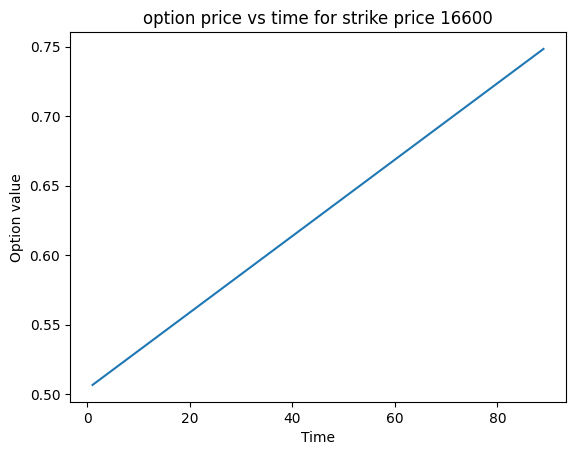

In [47]:
import matplotlib.pyplot as plt 

X = final_pred_options
Y = time

plt.plot(Y, X)

plt.xlabel("Time")
plt.ylabel("Option value")

# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()

plt.title("option price vs time for strike price 16600")

plt.show()